In [47]:
words = open('names.txt', 'r').read().splitlines()

In [48]:
words[0:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [49]:
len(words)

32033

In [50]:
min(len(w) for w in words) # smallest word length

2

In [51]:
max(len(w) for w in words) # largest word length

15

In [73]:
# all the characters in the words and giving then unique id in the form of a dictionary in alphabetical order
char_to_id = {char: i+1 for i, char in enumerate(sorted(set(''.join(words))))}
char_to_id['.'] = 0
char_to_id


{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

### Bigram character Model

In [74]:
for w in words[:1]:
    w = '.' + w + '.'
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)

. e
e m
m m
m a
a .


In [75]:
w

'.emma.'

In [76]:
b = {}
for w in words:
    w = '.' + w + '.'
    for ch1, ch2 in zip(w, w[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
            

In [77]:
b

{('.', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '.'): 6640,
 ('.', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('.', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('.', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('.', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('.', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '.'): 3983,
 ('.', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('.', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '.'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '.'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,
 ('g', 'a'): 330,
 ('a',

In [78]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

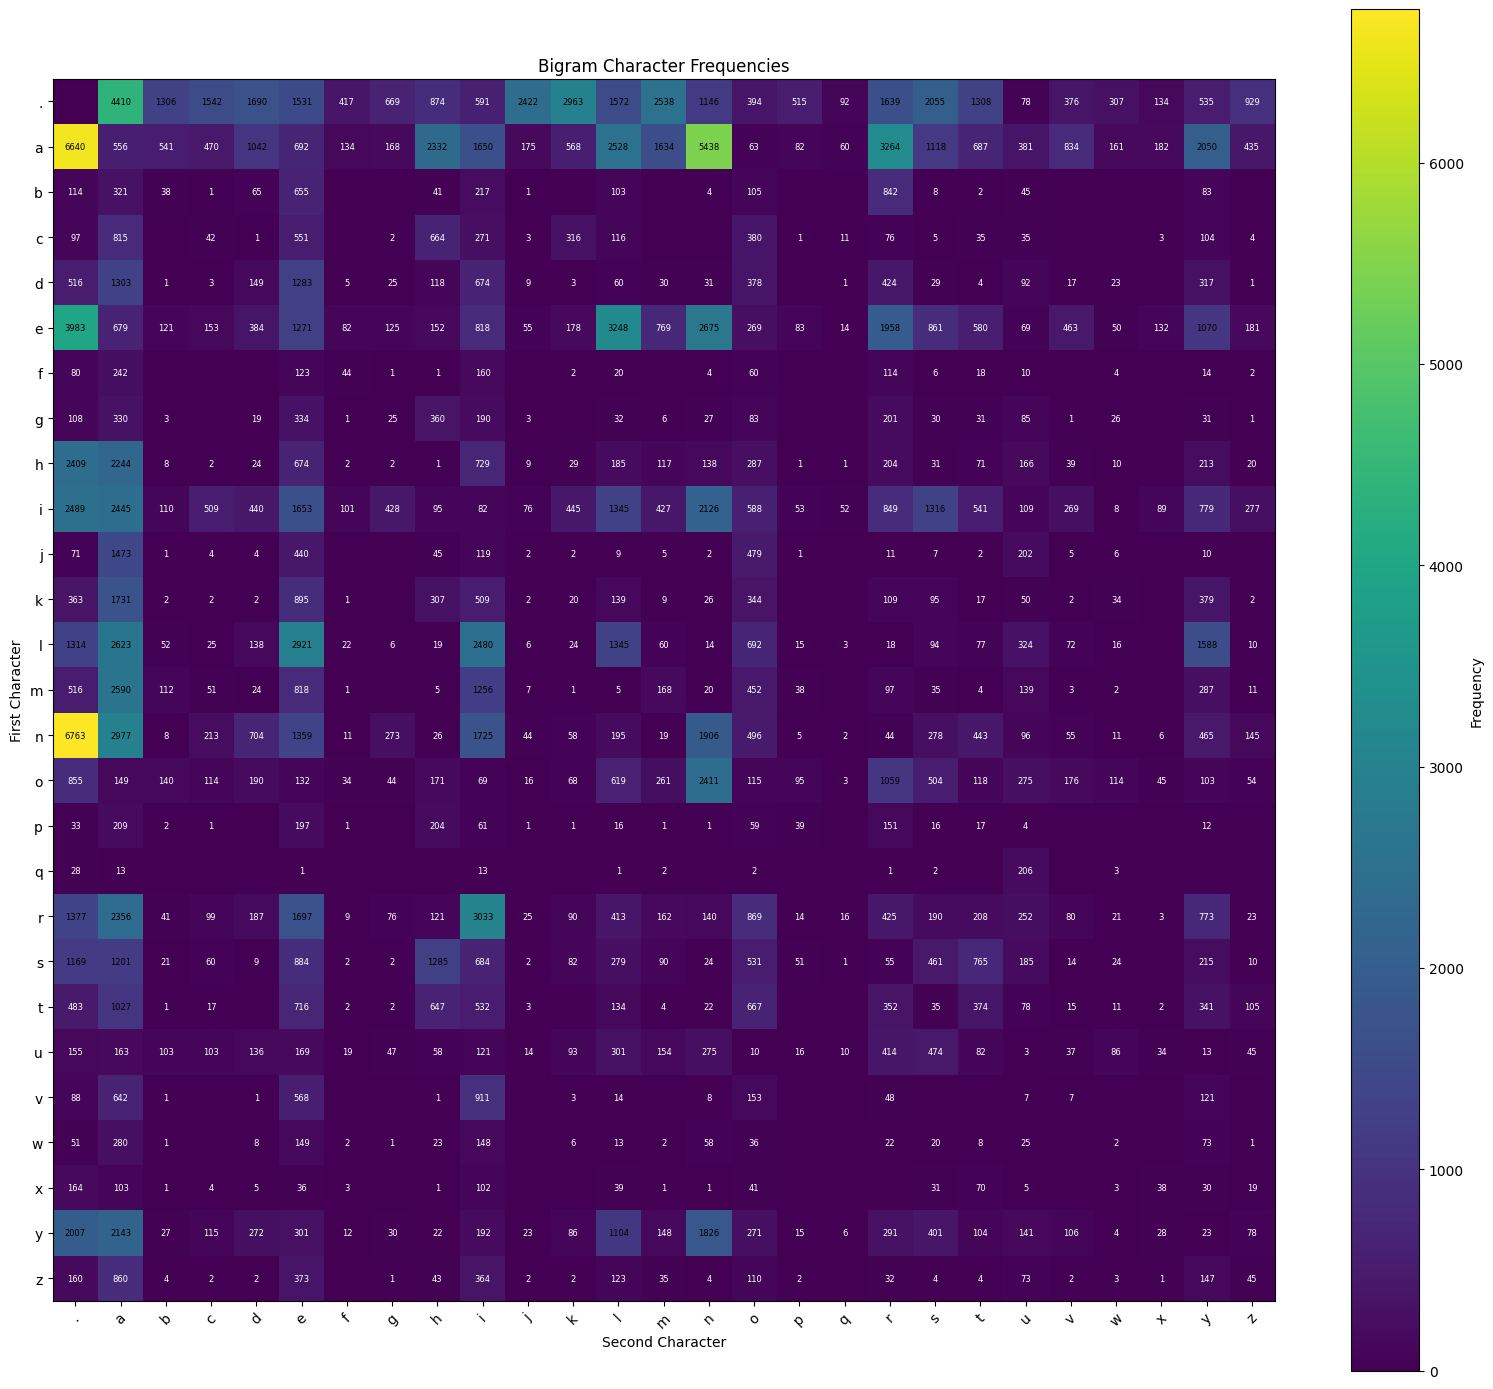

In [79]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Create a matrix to hold the bigram frequencies
n = len(char_to_id)
bigram_matrix = np.zeros((n, n))

# Fill the matrix with bigram frequencies
for (ch1, ch2), freq in b.items():
    i = char_to_id[ch1]
    j = char_to_id[ch2]
    bigram_matrix[i, j] = freq

# Create a mapping from ID to character for labeling
id_to_char = {i: ch for ch, i in char_to_id.items()}
labels = [id_to_char.get(i, '') for i in range(n)]

# Plot the heatmap
plt.figure(figsize=(16, 14))
plt.imshow(bigram_matrix, cmap='viridis')
plt.colorbar(label='Frequency')

# Set the ticks and labels
plt.xticks(range(n), labels, rotation=45, fontsize=10)
plt.yticks(range(n), labels, fontsize=10)
plt.xlabel('Second Character')
plt.ylabel('First Character')
plt.title('Bigram Character Frequencies')

# Add text annotations for all frequencies (with smaller font for readability)
for i in range(n):
    for j in range(n):
        if bigram_matrix[i, j] > 0:  # Only show non-zero frequencies
            plt.text(j, i, int(bigram_matrix[i, j]), ha='center', va='center', 
                    color='black' if bigram_matrix[i, j] > 1000 else 'white',
                    fontsize=6)  # Smaller font size for all values

plt.tight_layout()


In [80]:
import torch

In [88]:
N = torch.zeros((27, 27), dtype=torch.int32)
# N = N / N.sum(dim=1, keepdim=True)  # Normalize by row

In [89]:
for w in words:
    w = '.' + w + '.'
    for ch1, ch2 in zip(w, w[1:]):
        i = char_to_id[ch1]
        j = char_to_id[ch2]
        N[i, j] += 1

In [90]:
itos = {i: ch for ch, i in char_to_id.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [84]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [91]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [92]:
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,